# Demonstrating on making a map plot with GIBS

In [14]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from owslib.wmts import WebMapTileService

import pandas as pd

In [15]:
def add_wmts_gibs_basemap(ax, layer='BlueMarble_ShadedRelief_Bathymetry', date='2016-02-05'):
    """
    Add a basemap from NASA GIBS
    for layer names see: https://wiki.earthdata.nasa.gov/display/GIBS/GIBS+Available+Imagery+Products#expand-ReferenceLayers9Layers
    """
    URL = 'http://gibs.earthdata.nasa.gov/wmts/epsg4326/best/wmts.cgi'
    wmts = WebMapTileService(URL)

    ax.add_wmts(wmts, layer, wmts_kwargs={'time': date})
    #NOTE: can access attributes:
    #wmts[layer].title
    return wmts

Text(0.5,1,'GIBS IMAGERY - MODIS_Terra_SurfaceReflectance_Bands143 : 2018-01-16')

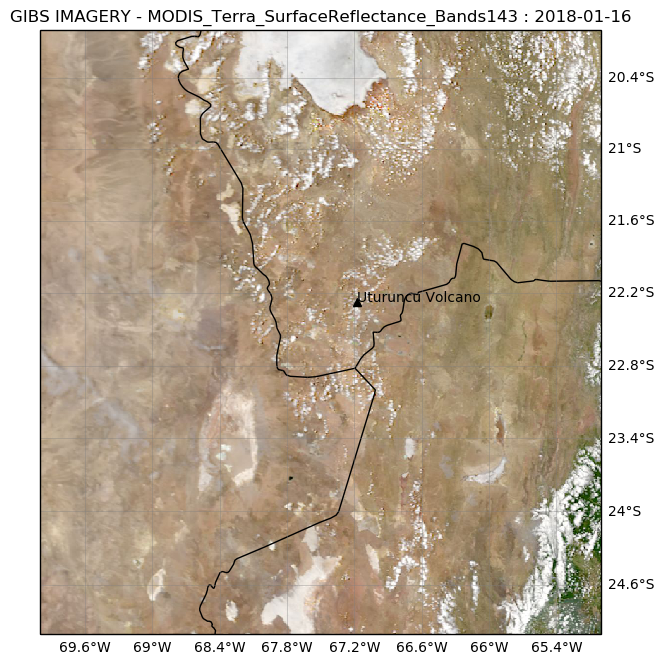

In [17]:
plot_CRS = ccrs.Mercator()
geodetic_CRS = ccrs.Geodetic()

x0, y0 = plot_CRS.transform_point(-70, -25, geodetic_CRS)
x1, y1 = plot_CRS.transform_point(-65, -20, geodetic_CRS)

fig,ax = plt.subplots(figsize=(8,8), dpi=100,
                      subplot_kw=dict(projection=plot_CRS))

ax.set_xlim((x0, x1))
ax.set_ylim((y0, y1))

# Add GIBS imagery as a basemap
today = pd.datetime.now().strftime('%Y-%m-%d')
layer = 'MODIS_Terra_SurfaceReflectance_Bands143'
wmts = add_wmts_gibs_basemap(ax, layer, today)

borders = cfeature.NaturalEarthFeature(scale='10m',
                             category='cultural',
                             name='admin_0_boundary_lines_land')
ax.add_feature(borders, facecolor='none', edgecolor='k')

ax.plot(-67.18, -22.27, 'k^', transform=geodetic_CRS)
ax.text(-67.18, -22.27, 'Uturuncu Volcano', transform=geodetic_CRS)

gl = ax.gridlines(ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.title('GIBS IMAGERY - {} : {}'.format(layer, today))